In [111]:
import pandas as pd

# List of file names
file_names = ['forest_land.csv','arable_land.csv', 'GDP.csv', 'CO2.csv']  # Add your file names

# Read the data from each file
dfs = [pd.read_csv(file, encoding='latin-1') for file in file_names]

# Determine the random indices (common for all files)
random_indices = dfs[0]['Country Name'].sample(4).index

# Save selected rows from each file into different output files
x = 0
for i, df in enumerate(dfs) :
    
    selected_rows = df.loc[random_indices]
    a = file_names[x]
    output_file = f'{a}'  # Unique output file name
    selected_rows.to_csv(output_file, index=False)
    print(f"Selected Rows from File {i + 1} Saved to: {output_file}")
    x= x+1


ValueError: Cannot take a larger sample than population when 'replace=False'

In [98]:
a = dfs[0]['Country Name'].sample(10)
country_name = []
for name in a:
    country_name.append(name)

country_name

['Myanmar',
 'Equatorial Guinea',
 nan,
 'Kiribati',
 'St. Martin (French part)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Uganda',
 'Burundi',
 'Sierra Leone',
 'Maldives']

In [104]:
import pandas as pd
import numpy as np

def read_preprocess_and_transpose(filename):
    """
    Reads, preprocesses, and transposes a World Bank format CSV file.

    Parameters:
        filename (str): The name of the CSV file.

    Returns:
        pd.DataFrame: The DataFrame after preprocessing.
        pd.DataFrame: The transposed DataFrame.
    """
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(filename, encoding='latin-1', na_values=['..'])  # Adjust encoding if needed

        # Specify the columns to be removed
        columns_to_remove = ['Series Name', 'Series Code', 'Country Code','2013 [YR2013]',	'2014 [YR2014]','2016 [YR2016]',	'2017 [YR2017]','2018 [YR2018]',	'2019 [YR2019]', '2021 [YR2021]', '2022 [YR2022]']

        # Remove the specified columns
        df = df.drop(columns=columns_to_remove, errors='ignore')

        # Remove rows with NaN values
        df = df.dropna()

        # Transpose the DataFrame
        transposed_df = df.set_index('Country Name').transpose()

        # Fill NaN values with the mean of each column
        transposed_df = transposed_df.apply(pd.to_numeric, errors='coerce')
        transposed_df = transposed_df.apply(lambda col: col.fillna(col.mean()))

        return df, transposed_df

    except Exception as e:
        print(f"Error reading or processing CSV file: {e}")
        return None, None

# Example usage:
filename = 'CO2.csv'  # Replace with the actual file name
df, df_transposed = read_preprocess_and_transpose(filename)

if df is not None and df_transposed is not None:
    print("DataFrame after removing specified columns and filling NaN values with the mean:")
    print(df)
    print("\nTransposed DataFrame:")
    print(df_transposed)
else:
    print("Failed to read or process the CSV file.")


DataFrame after removing specified columns and filling NaN values with the mean:
          Country Name  1990 [YR1990]  2000 [YR2000]  2015 [YR2015]  \
0              Albania   11181.074270    8163.977582    9408.765344   
2              Armenia   24389.028250    5990.512959    9155.783080   
3  Antigua and Barbuda     358.408496     584.648482    1085.816188   

   2020 [YR2020]  
0    8304.294940  
2   10422.041170  
3    1203.631334  

Transposed DataFrame:
Country Name        Albania       Armenia  Antigua and Barbuda
1990 [YR1990]  11181.074270  24389.028250           358.408496
2000 [YR2000]   8163.977582   5990.512959           584.648482
2015 [YR2015]   9408.765344   9155.783080          1085.816188
2020 [YR2020]   8304.294940  10422.041170          1203.631334


In [105]:
df

,Country Name,1990 [YR1990],2000 [YR2000],2015 [YR2015],2020 [YR2020]
0,Albania,11181.074270,8163.977582,9408.765344,8304.294940
2,Armenia,24389.028250,5990.512959,9155.783080,10422.041170
3,Antigua and Barbuda,358.408496,584.648482,1085.816188,1203.631334


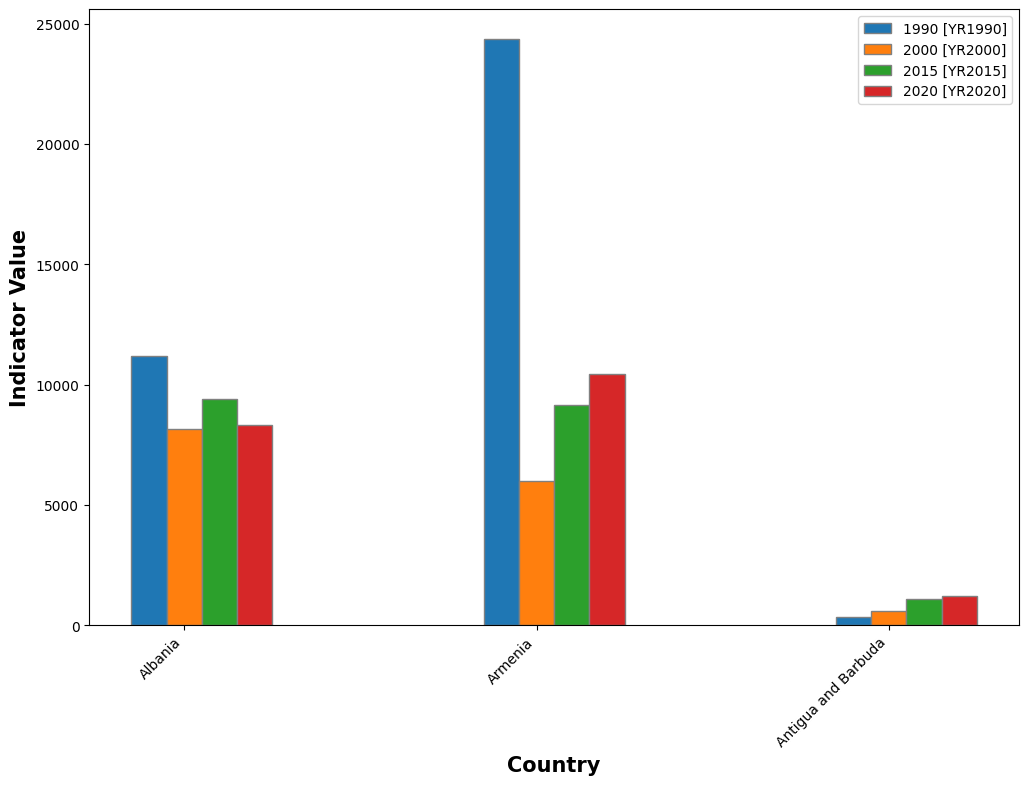

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_transposed is your transposed DataFrame
# If it's not, replace df_transposed with your actual DataFrame

# Extract the country names and years from the DataFrame
countries = df_transposed.columns.tolist()
years = df_transposed.index.tolist()

# set width of bar
barWidth = 0.10
fig = plt.subplots(figsize=(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(countries))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
for idx, year in enumerate(years):
    plt.bar(br1 + idx * barWidth, df_transposed.loc[year], width=barWidth, edgecolor='grey', label=year)

# Adding Xticks
plt.xlabel('Country', fontweight='bold', fontsize=15)
plt.ylabel('Indicator Value', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(countries))], countries, rotation=45, ha='right')
plt.legend()
plt.show()
